In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import scikit_posthocs as sp

In [3]:
result_dir = 'C:/Users/simon/Desktop/Ergebnisse'

In [10]:
fn0 = pd.read_csv(f'{result_dir}/fn_roa0.csv')
fn4 = pd.read_csv(f'{result_dir}/fn_roa4.csv')
fn01 = pd.read_csv(f'{result_dir}/function_normals_01_new.csv')
fn234 = pd.read_csv(f'{result_dir}/function_normals_234_new.csv')

fv01 = pd.read_csv(f'{result_dir}/function_values_01.csv')
fv234 = pd.read_csv(f'{result_dir}/function_values_234.csv')
fv0 = pd.read_csv(f'{result_dir}/fv_roa0.csv')
fv4 = pd.read_csv(f'{result_dir}/fv_roa4.csv')

m01 = pd.read_csv(f'{result_dir}/mesh_01.csv')
m234 = pd.read_csv(f'{result_dir}/mesh_234.csv')
m0 = pd.read_csv(f'{result_dir}/mesh_roa0.csv')
m4 = pd.read_csv(f'{result_dir}/mesh_roa4.csv')

s01 = pd.read_csv(f'{result_dir}/sphere_01.csv')
s234 = pd.read_csv(f'{result_dir}/sphere_234.csv')
s0 = pd.read_csv(f'{result_dir}/sphere_roa0.csv')
s4 = pd.read_csv(f'{result_dir}/sphere_roa4.csv')

In [11]:
fn = pd.concat([fn01, fn234])
fv = pd.concat([fv01, fv234])
m = pd.concat([m01, m234])
s = pd.concat([s01, s234])

In [12]:
fn.shape

(479, 81)

In [13]:
fn01.set_index('dir', inplace=True)
fv01.set_index('dir', inplace=True)
m01.set_index('dir', inplace=True)
s01.set_index('dir', inplace=True)

fn234.set_index('dir', inplace=True)
fv234.set_index('dir', inplace=True)
m234.set_index('dir', inplace=True)
s234.set_index('dir', inplace=True)

fn0.set_index('dir', inplace=True)
fv0.set_index('dir', inplace=True)
m0.set_index('dir', inplace=True)
s0.set_index('dir', inplace=True)

fn4.set_index('dir', inplace=True)
fv4.set_index('dir', inplace=True)
m4.set_index('dir', inplace=True)
s4.set_index('dir', inplace=True)

In [14]:
fn.set_index('dir', inplace=True)
fv.set_index('dir', inplace=True)
m.set_index('dir', inplace=True)
s.set_index('dir', inplace=True)

## Filter outliers ($\geq$ 5 standard deviations in positive direction)

In [15]:
fn01 = fn01[fn01.isna().any(axis=1) == False]
fv01 = fv01[fv01.isna().any(axis=1) == False]
m01 = m01[m01.isna().any(axis=1) == False]
s01 = s01[s01.isna().any(axis=1) == False]

fn234 = fn234[fn234.isna().any(axis=1) == False]
fv234 = fv234[fv234.isna().any(axis=1) == False]
m234 = m234[m234.isna().any(axis=1) == False]
s234 = s234[s234.isna().any(axis=1) == False]

fn0 = fn0[fn0.isna().any(axis=1) == False]
fv0 = fv0[fv0.isna().any(axis=1) == False]
m0 = m0[m0.isna().any(axis=1) == False]
s0 = s0[s0.isna().any(axis=1) == False]

fn4 = fn4[fn4.isna().any(axis=1) == False]
fv4 = fv4[fv4.isna().any(axis=1) == False]
m4 = m4[m4.isna().any(axis=1) == False]
s4 = s4[s4.isna().any(axis=1) == False]

fn01 = fn01[(stats.zscore(fn01) < 5).all(axis=1)]
fv01 = fv01[(stats.zscore(fv01) < 5).all(axis=1)]
m01 = m01[(stats.zscore(m01) < 5).all(axis=1)]
s01 = s01[(stats.zscore(s01) < 5).all(axis=1)]

fn234 = fn234[(stats.zscore(fn234) < 5).all(axis=1)]
fv234 = fv234[(stats.zscore(fv234) < 5).all(axis=1)]
m234 = m234[(stats.zscore(m234) < 5).all(axis=1)]
s234 = s234[(stats.zscore(s234) < 5).all(axis=1)]

fn0 = fn0[(stats.zscore(fn0) < 5).all(axis=1)]
fv0 = fv0[(stats.zscore(fv0) < 5).all(axis=1)]
m0 = m0[(stats.zscore(m0) < 5).all(axis=1)]
s0 = s0[(stats.zscore(s0) < 5).all(axis=1)]

fn4 = fn4[(stats.zscore(fn4) < 5).all(axis=1)]
fv4 = fv4[(stats.zscore(fv4) < 5).all(axis=1)]
m4 = m4[(stats.zscore(m4) < 5).all(axis=1)]
s4 = s4[(stats.zscore(s4) < 5).all(axis=1)]

intersection = fn01.index.intersection(fv01.index.intersection(m01.index.intersection(s01.index)))
fn01 = fn01.loc[intersection]
fv01 = fv01.loc[intersection]
m01 = m01.loc[intersection]
s01 = s01.loc[intersection]

intersection = fn234.index.intersection(fv234.index.intersection(m234.index.intersection(s234.index)))
fn234 = fn234.loc[intersection]
fv234 = fv234.loc[intersection]
m234 = m234.loc[intersection]
s234 = s234.loc[intersection]

intersection = fn0.index.intersection(fv0.index.intersection(m0.index.intersection(s0.index)))
fn0 = fn0.loc[intersection]
fv0 = fv0.loc[intersection]
m0 = m0.loc[intersection]
s0 = s0.loc[intersection]

intersection = fn4.index.intersection(fv4.index.intersection(m4.index.intersection(s4.index)))
fn4 = fn4.loc[intersection]
fv4 = fv4.loc[intersection]
m4 = m4.loc[intersection]
s4 = s4.loc[intersection]

In [16]:
fn = fn[fn.isna().any(axis=1) == False]
fv = fv[fv.isna().any(axis=1) == False]
m = m[m.isna().any(axis=1) == False]
s = s[s.isna().any(axis=1) == False]

In [17]:
numrows = fn.shape[0]
fn_ = fn[(stats.zscore(fn) < 5).all(axis=1)]
print(f'Filtered out {numrows - fn.shape[0]} instances.')

Filtered out 0 instances.


In [18]:
numrows = fv.shape[0]
fv_ = fv[(stats.zscore(fv) < 5).all(axis=1)]
print(f'Filtered out {numrows - fv.shape[0]} instances.')

Filtered out 0 instances.


In [19]:
numrows = m.shape[0]
m_ = m[(stats.zscore(m) < 5).all(axis=1)]
print(f'Filtered out {numrows - m.shape[0]} instances.')

Filtered out 0 instances.


In [20]:
numrows = s.shape[0]
s_ = s[(stats.zscore(s) < 5).all(axis=1)]
print(f'Filtered out {numrows - s.shape[0]} instances.')

Filtered out 0 instances.


In [21]:
fn_complement = fn.merge(fn_, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
fv_complement = fv.merge(fv_, how='outer', indicator=True).loc[lambda x: x['_merge']=='left_only']
m_complement = m.merge(m_, how='outer', indicator=True).loc[lambda x: x['_merge']=='left_only']
s_complement = s.merge(s_, how='outer', indicator=True).loc[lambda x: x['_merge']=='left_only']

In [22]:
fn_complement.index.intersection(fv_complement.index.intersection(m_complement.index.intersection(s_complement.index))).shape

(0,)

In [23]:
numrows = fn.shape[0]
fn = fn[(stats.zscore(fn) < 5).all(axis=1)]
print(f'Filtered out {numrows - fn.shape[0]} instances.')

Filtered out 16 instances.


In [24]:
numrows = fv.shape[0]
fv = fv[(stats.zscore(fv) < 5).all(axis=1)]
print(f'Filtered out {numrows - fv.shape[0]} instances.')

Filtered out 8 instances.


In [25]:
numrows = m.shape[0]
m = m[(stats.zscore(m) < 5).all(axis=1)]
print(f'Filtered out {numrows - m.shape[0]} instances.')

Filtered out 11 instances.


In [26]:
numrows = s.shape[0]
s = s[(stats.zscore(s) < 5).all(axis=1)]
print(f'Filtered out {numrows - s.shape[0]} instances.')

Filtered out 21 instances.


Compute intersection of dataframes

In [27]:
intersection = fn.index.intersection(fv.index.intersection(m.index.intersection(s.index)))

In [28]:
fn = fn.loc[intersection]
fv = fv.loc[intersection]
m = m.loc[intersection]
s = s.loc[intersection]

In [29]:
assert fn.shape == fv.shape == m.shape == s.shape

In [30]:
fn.shape

(440, 80)

In [31]:
all_cols = ['ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'aLF', 'aMF', 'pLF', 'pMF', 
           'cLT', 'iLT', 'eLT', 'aLT', 'pLT', 'cMT', 'iMT', 'eMT', 'aMT', 'pMT']

f_cols = ['ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'aLF', 'aMF', 'pLF', 'pMF']
t_cols = ['cLT', 'iLT', 'eLT', 'aLT', 'pLT', 'cMT', 'iMT', 'eMT', 'aMT', 'pMT']

lf_cols = ['ecLF', 'ccLF', 'icLF', 'aLF', 'pLF']
mf_cols = ['ecMF', 'ccMF', 'icMF', 'aMF', 'pMF']
lt_cols = ['cLT', 'iLT', 'eLT', 'aLT', 'pLT']
mt_cols = ['cMT', 'iMT', 'eMT', 'aMT', 'pMT']

In [37]:
fn.to_csv(f'{result_dir}/function_normals_cleaned.csv')
fv.to_csv(f'{result_dir}/function_values_cleaned.csv')
m.to_csv(f'{result_dir}/mesh_cleaned.csv')
s.to_csv(f'{result_dir}/sphere_cleaned.csv')

In [38]:
tmp = fn[lf_cols].join(m[lf_cols], lsuffix="_c", rsuffix="_o")
tmp

,ecLF_c,ccLF_c,icLF_c,aLF_c,pLF_c,ecLF_o,ccLF_o,icLF_o,aLF_o,pLF_o
dir,,,,,,,,,,
9003430,1.727473,2.583704,1.780085,2.622144,2.640635,1.696027,2.508189,1.797149,2.369889,2.562541
9005075,1.614442,2.348911,1.738658,3.008500,2.626156,1.523235,2.258569,1.661195,2.199330,2.461835
9005132,1.552880,2.230086,1.583020,2.506600,1.941073,1.630033,2.094076,1.663188,2.002967,1.671239
9006723,1.734058,2.826189,1.956998,3.136161,2.611207,1.667508,2.690765,2.022126,2.275437,2.421498
9008561,1.402152,2.612312,1.607943,2.528422,1.922628,1.365346,2.486039,1.659599,1.987858,1.898787
...,...,...,...,...,...,...,...,...,...,...
9598683,1.598494,2.492819,1.976467,3.421928,2.354452,1.787374,2.501255,1.969794,2.703604,2.422142
9695686,1.534789,2.792691,2.249444,2.534655,1.899720,1.610656,2.675203,2.294859,2.367775,1.875567
9691663,1.888034,2.713233,1.598871,2.604986,2.601199,1.940666,2.631743,1.604886,2.149315,2.967460


In [39]:
tmp.columns = pd.MultiIndex.from_tuples([(x[-1], x[:-2]) for x in tmp.columns])
tmp

c                                                 o            \
             ecLF      ccLF      icLF       aLF       pLF      ecLF      ccLF   
dir                                                                             
9003430  1.727473  2.583704  1.780085  2.622144  2.640635  1.696027  2.508189   
9005075  1.614442  2.348911  1.738658  3.008500  2.626156  1.523235  2.258569   
9005132  1.552880  2.230086  1.583020  2.506600  1.941073  1.630033  2.094076   
9006723  1.734058  2.826189  1.956998  3.136161  2.611207  1.667508  2.690765   
9008561  1.402152  2.612312  1.607943  2.528422  1.922628  1.365346  2.486039   
...           ...       ...       ...       ...       ...       ...       ...   
9598683  1.598494  2.492819  1.976467  3.421928  2.354452  1.787374  2.501255   
9695686  1.534789  2.792691  2.249444  2.534655  1.899720  1.610656  2.675203   
9691663  1.888034  2.713233  1.598871  2.604986  2.601199  1.940666  2.631743   
9657594  1.387113  1.555123  1.238230  2.717193  2.392049  1.325456  1.417946   
9566781  1.234443  1.608091  1.376223  1.836413  2.485203  1.200327  1.474555   

                                       
             icLF       aLF       pLF  
dir                                    
9003430  1.797149  2.369889  2.562541  
9005075  1.661195  2.199330  2.461835  
9005132  1.663188  2.002967  1.671239  
9006723  2.022126  2.275437  2.421498  
9008561  1.659599  1.987858  1.898787  
...           ...       ...       ...  
9598683  1.969794  2.703604  2.422142  
9695686  2.294859  2.367775  1.875567  
9691663  1.604886  2.149315  2.967460  
9657594  1.387567  2.141117  2.193440  
9566781  1.260691  1.512918  2.370210  

[440 rows x 10 columns]

In [40]:
tmp.to_csv(f'{result_dir}/test.csv', index=False, index_label=False)

In [32]:
fn_all_regions_mean = fn[all_cols].apply(np.mean, axis=1)
fv_all_regions_mean = fv[all_cols].apply(np.mean, axis=1)
m_all_regions_mean = m[all_cols].apply(np.mean, axis=1)
s_all_regions_mean = s[all_cols].apply(np.mean, axis=1)

In [33]:
fn_f_mean = fn[f_cols].apply(np.mean, axis=1)
fn_t_mean = fn[t_cols].apply(np.mean, axis=1)

fv_f_mean = fv[f_cols].apply(np.mean, axis=1)
fv_t_mean = fv[t_cols].apply(np.mean, axis=1)

m_f_mean = m[f_cols].apply(np.mean, axis=1)
m_t_mean = m[t_cols].apply(np.mean, axis=1)

s_f_mean = s[f_cols].apply(np.mean, axis=1)
s_t_mean = s[t_cols].apply(np.mean, axis=1)

In [34]:
fn_lf_mean = fn[lf_cols].apply(np.mean, axis=1)
fn_mf_mean = fn[mf_cols].apply(np.mean, axis=1)
fn_lt_mean = fn[lt_cols].apply(np.mean, axis=1)
fn_mt_mean = fn[mt_cols].apply(np.mean, axis=1)

In [35]:
fv_lf_mean = fv[lf_cols].apply(np.mean, axis=1)
fv_mf_mean = fv[mf_cols].apply(np.mean, axis=1)
fv_lt_mean = fv[lt_cols].apply(np.mean, axis=1)
fv_mt_mean = fv[mt_cols].apply(np.mean, axis=1)

In [36]:
m_lf_mean = m[lf_cols].apply(np.mean, axis=1)
m_mf_mean = m[mf_cols].apply(np.mean, axis=1)
m_lt_mean = m[lt_cols].apply(np.mean, axis=1)
m_mt_mean = m[mt_cols].apply(np.mean, axis=1)

In [37]:
s_lf_mean = s[lf_cols].apply(np.mean, axis=1)
s_mf_mean = s[mf_cols].apply(np.mean, axis=1)
s_lt_mean = s[lt_cols].apply(np.mean, axis=1)
s_mt_mean = s[mt_cols].apply(np.mean, axis=1)

In [38]:
fn_all_regions = fn[all_cols]
fv_all_regions = fv[all_cols]
m_all_regions = m[all_cols]
s_all_regions = s[all_cols]

In [51]:
pd.DataFrame({'fn': fn_all_regions_mean, 'fv': fv_all_regions_mean, 'm': m_all_regions_mean, 's': s_all_regions_mean}).to_csv(f'{result_dir}/subregions/all_regions_mean.csv')

In [52]:
pd.DataFrame({'fn': fn_f_mean, 'fv': fv_f_mean, 'm': m_f_mean, 's': s_f_mean}).to_csv(f'{result_dir}/subregions/femur_mean.csv')

In [53]:
pd.DataFrame({'fn': fn_t_mean, 'fv': fv_t_mean, 'm': m_t_mean, 's': s_t_mean}).to_csv(f'{result_dir}/subregions/tibia_mean.csv')

In [54]:
pd.DataFrame({'fn': fn_lf_mean, 'fv': fv_lf_mean, 'm': m_lf_mean, 's': s_lf_mean}).to_csv(f'{result_dir}/subregions/lateral_femur_mean.csv')

In [55]:
pd.DataFrame({'fn': fn_mf_mean, 'fv': fv_mf_mean, 'm': m_mf_mean, 's': s_mf_mean}).to_csv(f'{result_dir}/subregions/medial_femur_mean.csv')

In [56]:
pd.DataFrame({'fn': fn_lt_mean, 'fv': fv_lt_mean, 'm': m_lt_mean, 's': s_lt_mean}).to_csv(f'{result_dir}/subregions/lateral_tibia_mean.csv')

In [57]:
pd.DataFrame({'fn': fn_mt_mean, 'fv': fv_mt_mean, 'm': m_mt_mean, 's': s_mt_mean}).to_csv(f'{result_dir}/subregions/medial_tibia_mean.csv')

In [58]:
for col in all_cols:
    pd.DataFrame({'fn': fn[col], 'fv': fv[col], 'm': m[col], 's': s[col]}).to_csv(f'{result_dir}/subregions/{col}.csv')

In [59]:
tmp1 = fn[all_cols].join(fv[all_cols], lsuffix="_fn", rsuffix="_fv")
tmp2 = m[all_cols].join(s[all_cols], lsuffix="_mm", rsuffix="_ss")
tmp = tmp1.join(tmp2)
tmp.columns = pd.MultiIndex.from_tuples([(x[-2:], x[:-3]) for x in tmp.columns])
tmp.to_csv(f'{result_dir}/test.csv', index=False, index_label=False)
tmp

fn                                                              \
             ecLF      ccLF      icLF      ecMF      ccMF      icMF       aLF   
dir                                                                             
9003430  1.727473  2.583704  1.780085  2.159492  2.018430  1.572289  2.622144   
9005075  1.614442  2.348911  1.738658  1.857935  2.637056  2.170869  3.008500   
9005132  1.552880  2.230086  1.583020  1.807203  2.091559  1.694322  2.506600   
9006723  1.734058  2.826189  1.956998  1.402333  2.530640  2.031166  3.136161   
9008561  1.402152  2.612312  1.607943  1.692545  2.031484  1.651580  2.528422   
...           ...       ...       ...       ...       ...       ...       ...   
9598683  1.598494  2.492819  1.976467  2.091039  2.963193  2.159342  3.421928   
9695686  1.534789  2.792691  2.249444  1.375810  1.951188  1.598290  2.534655   
9691663  1.888034  2.713233  1.598871  0.648245  0.746290  1.898045  2.604986   
9657594  1.387113  1.555123  1.238230  1.763768  2.778664  1.895194  2.717193   
9566781  1.234443  1.608091  1.376223  1.753240  2.339938  1.520936  1.836413   

                                       ...        ss                      \
              aMF       pLF       pMF  ...       cLT       iLT       eLT   
dir                                    ...                                 
9003430  2.288049  2.640635  2.731340  ...  2.972551  3.092084  2.407562   
9005075  2.841687  2.626156  2.353918  ...  2.559864  4.190298  1.644701   
9005132  2.433427  1.941073  2.232174  ...  2.817672  3.996206  1.544210   
9006723  2.807098  2.611207  2.548575  ...  2.011915  3.345898  1.578337   
9008561  2.348023  1.922628  1.984391  ...  2.044748  3.040228  1.460773   
...           ...       ...       ...  ...       ...       ...       ...   
9598683  3.410748  2.354452  3.483179  ...  1.934407  3.143425  1.810356   
9695686  2.509718  1.899720  2.295808  ...  1.655529  3.625198  1.509856   
9691663  2.384000  2.601199  2.442011  ...  2.315893  3.584096  2.245790   
9657594  2.883948  2.392049  2.663837  ...  1.995360  4.348674  1.680354   
9566781  2.141776  2.485203  2.353821  ...  2.889488  3.359186  2.558631   

                                                                               
              aLT       pLT       cMT       iMT       eMT       aMT       pMT  
dir                                                                            
9003430  2.157337  2.894261  4.497225  4.275015  2.526909  3.102533  3.050382  
9005075  2.318081  2.215242  3.804307  4.249429  1.770059  2.298101  2.274709  
9005132  2.083083  1.988680  2.928680  2.894519  1.869434  2.453709  2.277800  
9006723  1.685869  2.445908  3.333202  3.450191  1.758650  2.085982  2.914452  
9008561  1.542347  2.492967  2.379626  2.855028  1.456873  1.683506  2.282275  
...           ...       ...       ...       ...       ...       ...       ...  
9598683  2.780469  2.939114  3.665542  3.804170  2.516424  2.718451  3.501004  
9695686  2.025150  2.155677  3.267119  3.315669  1.747947  2.039575  2.241446  
9691663  2.806048  3.079709  1.329612  1.657807  3.054679  1.846151  1.773351  
9657594  1.975966  2.618145  3.518459  3.922377  2.076993  2.404622  2.705697  
9566781  3.364607  2.575019  2.319572  3.121854  1.794463  2.060602  2.733470  

[440 rows x 80 columns]

In [60]:
tmp.columns

MultiIndex([('fn', 'ecLF'),
            ('fn', 'ccLF'),
            ('fn', 'icLF'),
            ('fn', 'ecMF'),
            ('fn', 'ccMF'),
            ('fn', 'icMF'),
            ('fn',  'aLF'),
            ('fn',  'aMF'),
            ('fn',  'pLF'),
            ('fn',  'pMF'),
            ('fn',  'cLT'),
            ('fn',  'iLT'),
            ('fn',  'eLT'),
            ('fn',  'aLT'),
            ('fn',  'pLT'),
            ('fn',  'cMT'),
            ('fn',  'iMT'),
            ('fn',  'eMT'),
            ('fn',  'aMT'),
            ('fn',  'pMT'),
            ('fv', 'ecLF'),
            ('fv', 'ccLF'),
            ('fv', 'icLF'),
            ('fv', 'ecMF'),
            ('fv', 'ccMF'),
            ('fv', 'icMF'),
            ('fv',  'aLF'),
            ('fv',  'aMF'),
            ('fv',  'pLF'),
            ('fv',  'pMF'),
            ('fv',  'cLT'),
            ('fv',  'iLT'),
            ('fv',  'eLT'),
            ('fv',  'aLT'),
            ('fv',  'pLT'),
            ('fv',  

# Explorative data analysis

In [39]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## Central weight-bearing femur

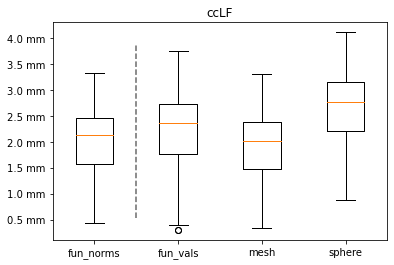

In [62]:
fig, ax = plt.subplots()
ax.boxplot([fn['ccLF'], fv['ccLF'], m['ccLF'], s['ccLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
ax.vlines(x=1.5, ymin=ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * .1, ymax=ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * .9, linestyles='dashed', colors=['dimgray'])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f mm'))
ax.set_title('ccLF')
plt.show()

In [63]:
ax.get_ylim()[0]

0.10701938552008738

In [64]:
ax.get_ylim()[0] + ((ax.get_ylim()[1] - ax.get_ylim()[0])*.2)

0.9463498464139349

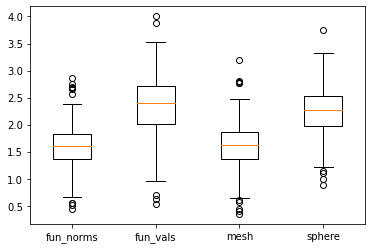

In [65]:
fig, ax = plt.subplots()
ax.boxplot([fn['icLF'], fv['icLF'], m['icLF'], s['icLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

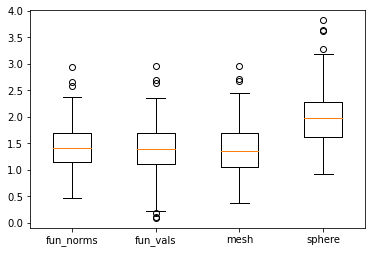

In [66]:
fig, ax = plt.subplots()
ax.boxplot([fn['ecLF'], fv['ecLF'], m['ecLF'], s['ecLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

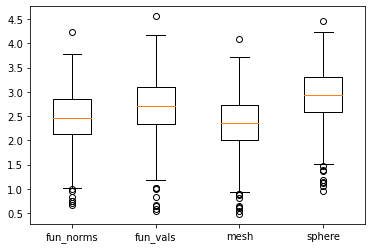

In [67]:
fig, ax = plt.subplots()
ax.boxplot([fn['ccMF'], fv['ccMF'], m['ccMF'], s['ccMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

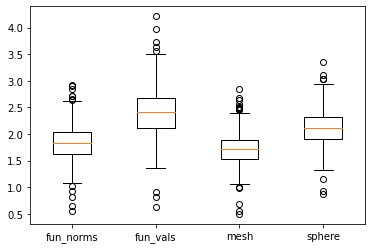

In [68]:
fig, ax = plt.subplots()
ax.boxplot([fn['icMF'], fv['icMF'], m['icMF'], s['icMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

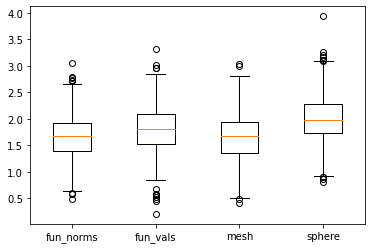

In [69]:
fig, ax = plt.subplots()
ax.boxplot([fn['ecMF'], fv['ecMF'], m['ecMF'], s['ecMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

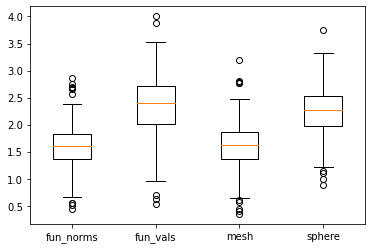

In [70]:
fig, ax = plt.subplots()
ax.boxplot([fn['icLF'], fv['icLF'], m['icLF'], s['icLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

## anterior and posterior femur

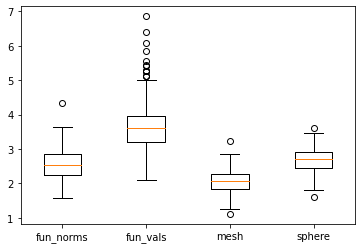

In [71]:
fig, ax = plt.subplots()
ax.boxplot([fn['aLF'], fv['aLF'], m['aLF'], s['aLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

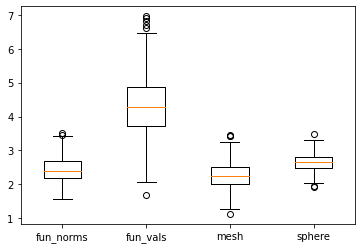

In [72]:
fig, ax = plt.subplots()
ax.boxplot([fn['aMF'], fv['aMF'], m['aMF'], s['aMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

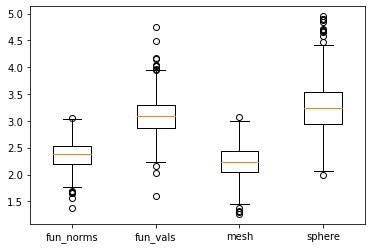

In [73]:
fig, ax = plt.subplots()
ax.boxplot([fn['pLF'], fv['pLF'], m['pLF'], s['pLF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

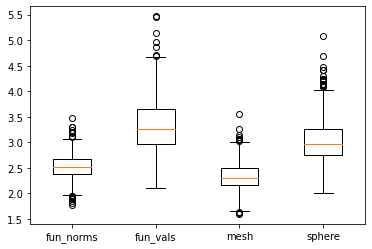

In [74]:
fig, ax = plt.subplots()
ax.boxplot([fn['pMF'], fv['pMF'], m['pMF'], s['pMF']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

## lateral tibia

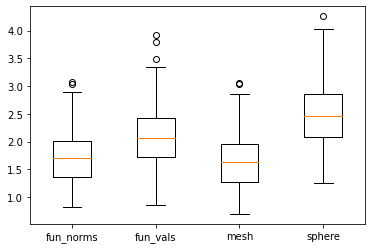

In [75]:
fig, ax = plt.subplots()
ax.boxplot([fn['cLT'], fv['cLT'], m['cLT'], s['cLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

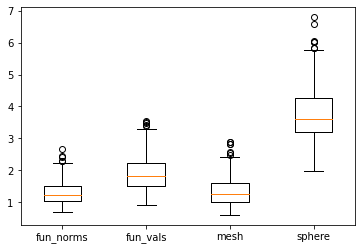

In [76]:
fig, ax = plt.subplots()
ax.boxplot([fn['iLT'], fv['iLT'], m['iLT'], s['iLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

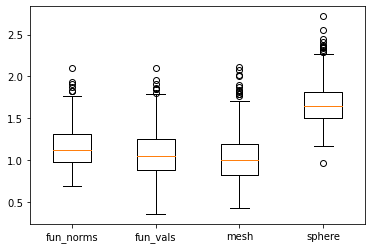

In [77]:
fig, ax = plt.subplots()
ax.boxplot([fn['eLT'], fv['eLT'], m['eLT'], s['eLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

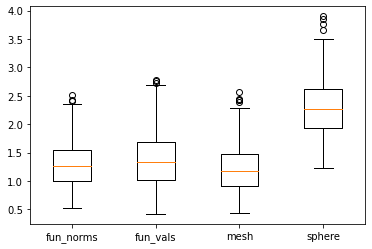

In [78]:
fig, ax = plt.subplots()
ax.boxplot([fn['aLT'], fv['aLT'], m['aLT'], s['aLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

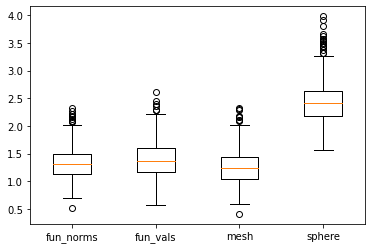

In [79]:
fig, ax = plt.subplots()
ax.boxplot([fn['pLT'], fv['pLT'], m['pLT'], s['pLT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

## medial tibia

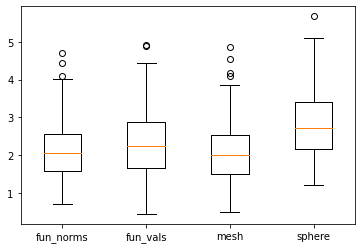

In [80]:
fig, ax = plt.subplots()
ax.boxplot([fn['cMT'], fv['cMT'], m['cMT'], s['cMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

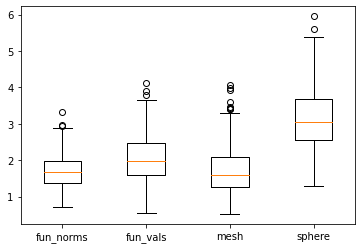

In [81]:
fig, ax = plt.subplots()
ax.boxplot([fn['iMT'], fv['iMT'], m['iMT'], s['iMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

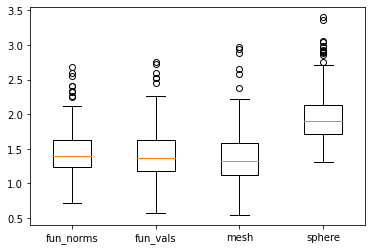

In [82]:
fig, ax = plt.subplots()
ax.boxplot([fn['eMT'], fv['eMT'], m['eMT'], s['eMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

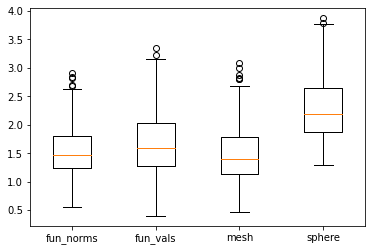

In [83]:
fig, ax = plt.subplots()
ax.boxplot([fn['aMT'], fv['aMT'], m['aMT'], s['aMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

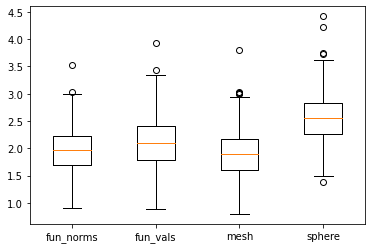

In [84]:
fig, ax = plt.subplots()
ax.boxplot([fn['pMT'], fv['pMT'], m['pMT'], s['pMT']])
ax.set_xticklabels(['fun_norms', 'fun_vals', 'mesh', 'sphere'])
plt.show()

## Comparison between rOA grades 0,1 and 2,3,4

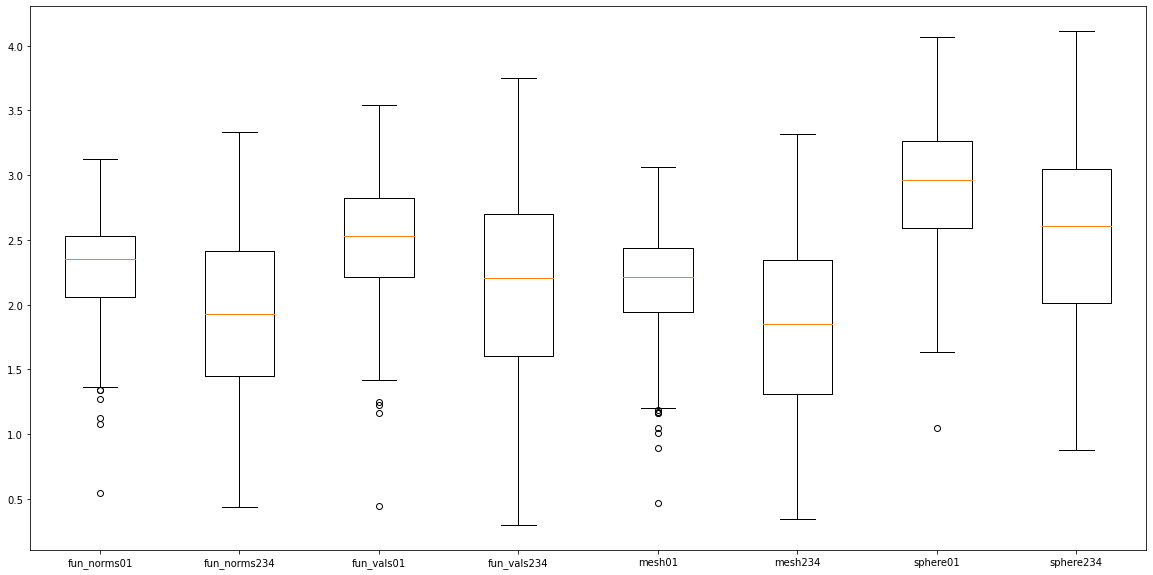

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['ccLF'], fn234['ccLF'], fv01['ccLF'], fv234['ccLF'], m01['ccLF'], m234['ccLF'], s01['ccLF'], s234['ccLF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

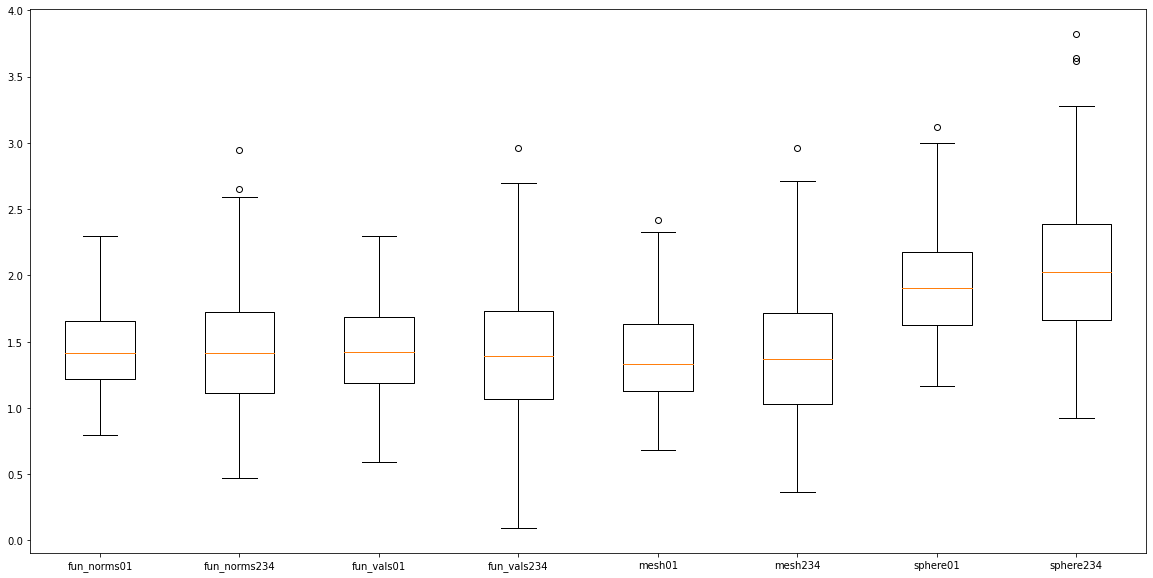

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['ecLF'], fn234['ecLF'], fv01['ecLF'], fv234['ecLF'], m01['ecLF'], m234['ecLF'], s01['ecLF'], s234['ecLF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

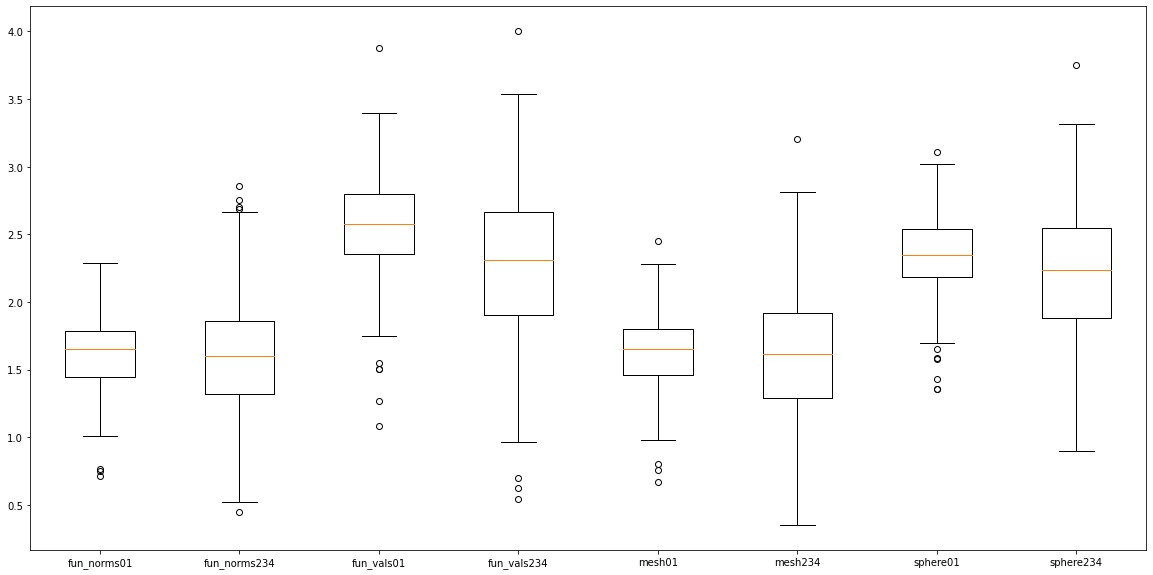

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['icLF'], fn234['icLF'], fv01['icLF'], fv234['icLF'], m01['icLF'], m234['icLF'], s01['icLF'], s234['icLF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

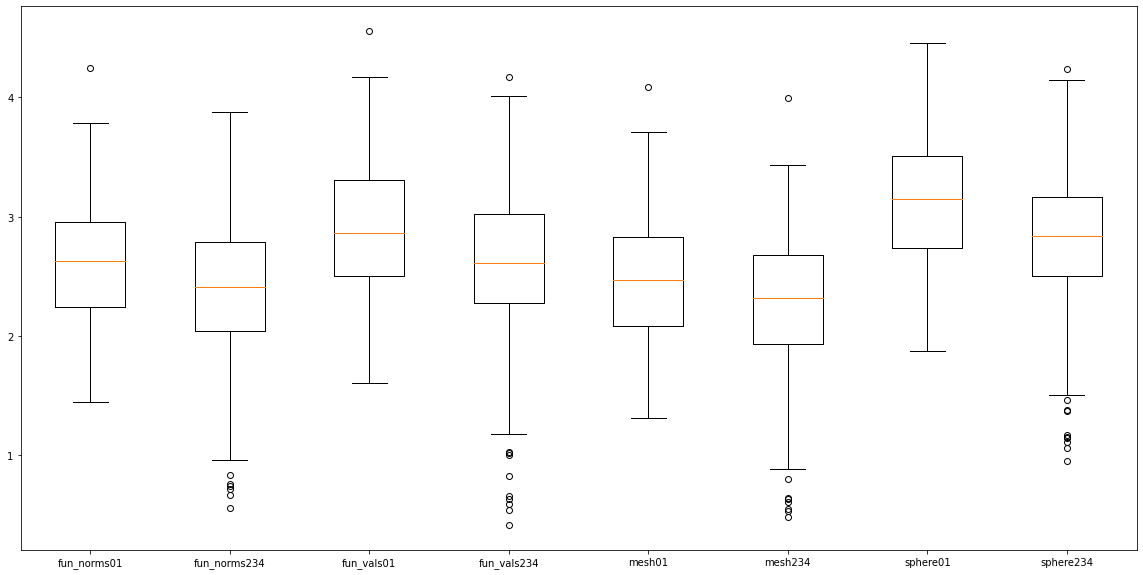

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['ccMF'], fn234['ccMF'], fv01['ccMF'], fv234['ccMF'], m01['ccMF'], m234['ccMF'], s01['ccMF'], s234['ccMF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

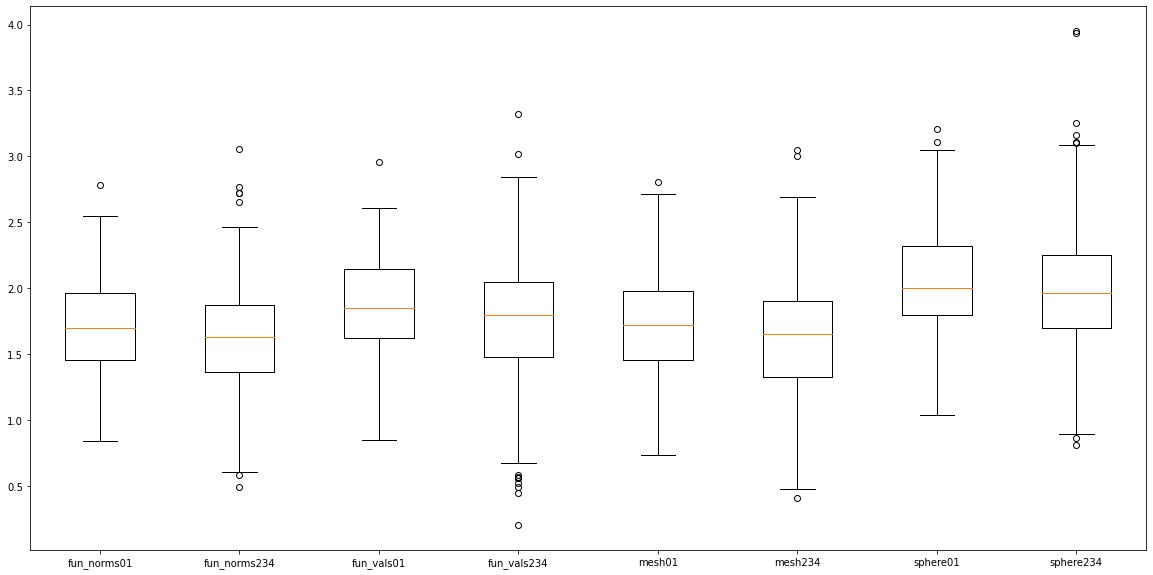

In [89]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['ecMF'], fn234['ecMF'], fv01['ecMF'], fv234['ecMF'], m01['ecMF'], m234['ecMF'], s01['ecMF'], s234['ecMF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

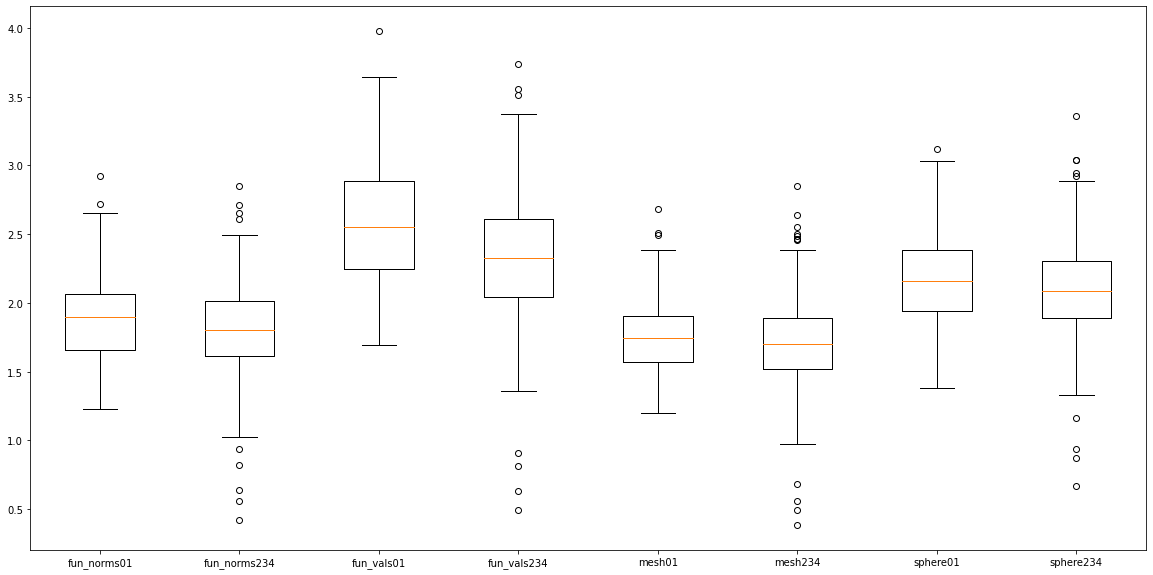

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['icMF'], fn234['icMF'], fv01['icMF'], fv234['icMF'], m01['icMF'], m234['icMF'], s01['icMF'], s234['icMF']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

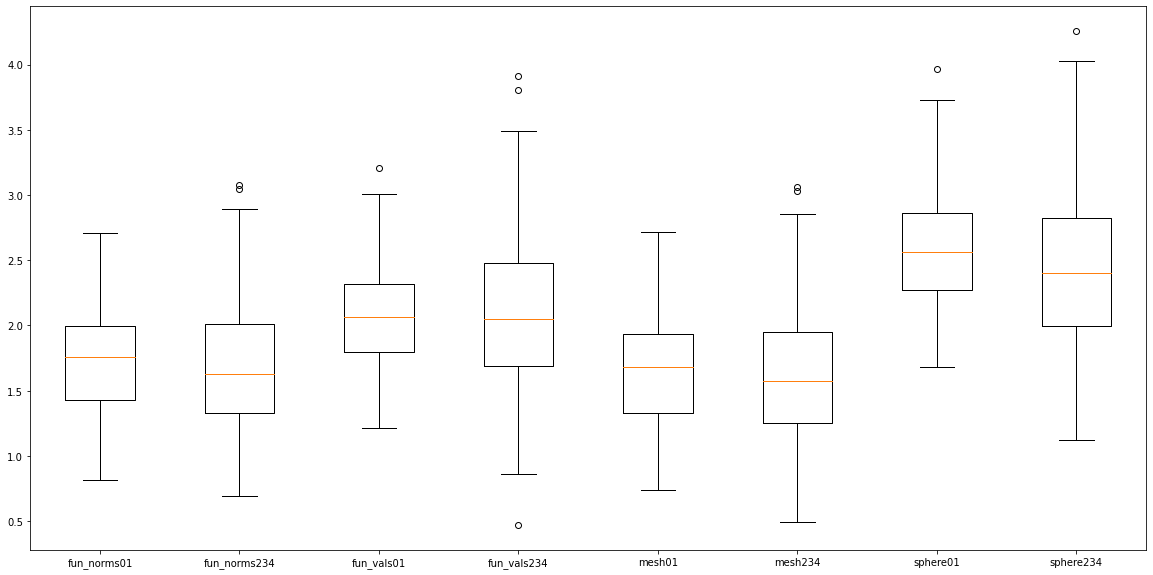

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['cLT'], fn234['cLT'], fv01['cLT'], fv234['cLT'], m01['cLT'], m234['cLT'], s01['cLT'], s234['cLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

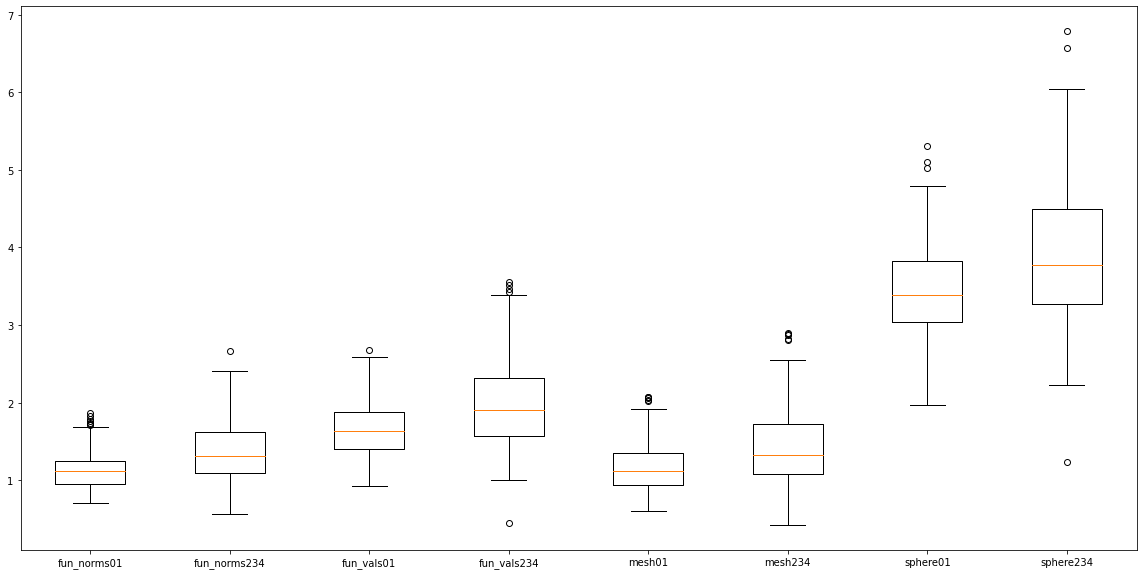

In [92]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['iLT'], fn234['iLT'], fv01['iLT'], fv234['iLT'], m01['iLT'], m234['iLT'], s01['iLT'], s234['iLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

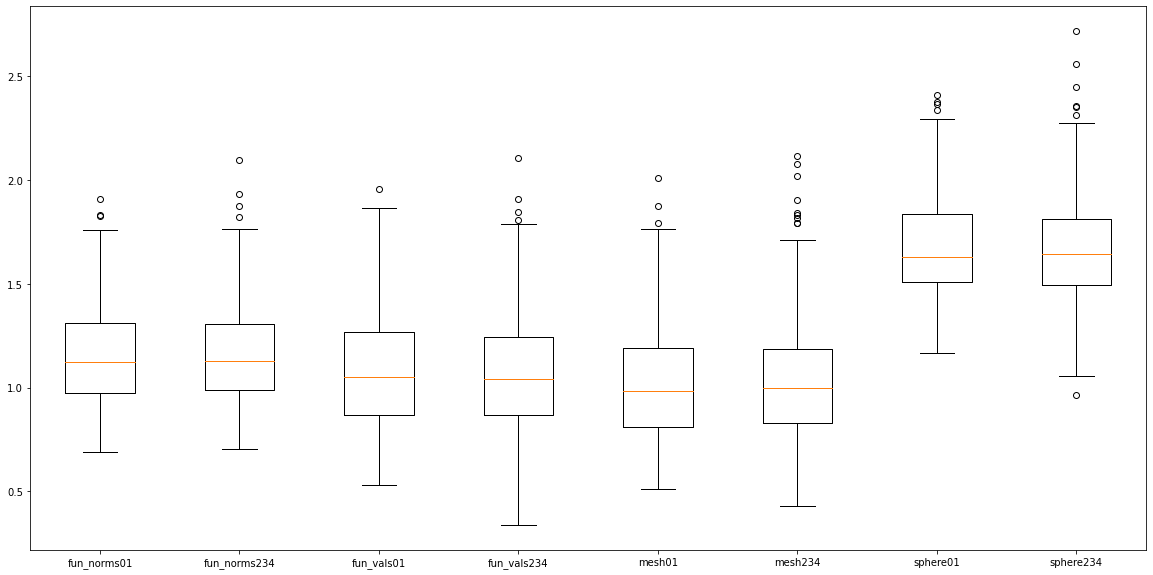

In [93]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['eLT'], fn234['eLT'], fv01['eLT'], fv234['eLT'], m01['eLT'], m234['eLT'], s01['eLT'], s234['eLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

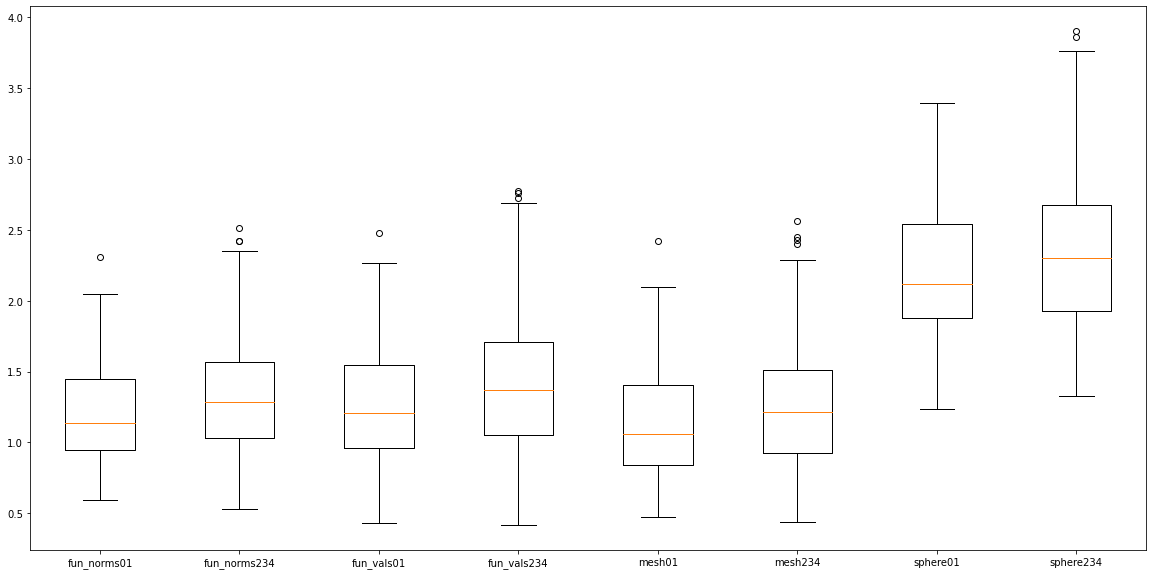

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['aLT'], fn234['aLT'], fv01['aLT'], fv234['aLT'], m01['aLT'], m234['aLT'], s01['aLT'], s234['aLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

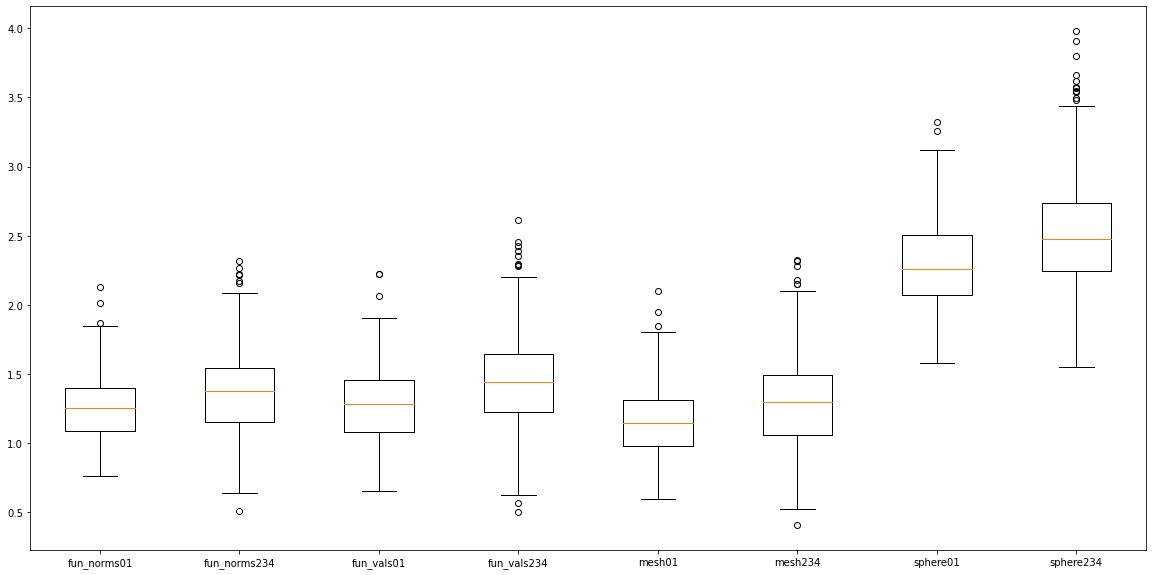

In [95]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['pLT'], fn234['pLT'], fv01['pLT'], fv234['pLT'], m01['pLT'], m234['pLT'], s01['pLT'], s234['pLT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

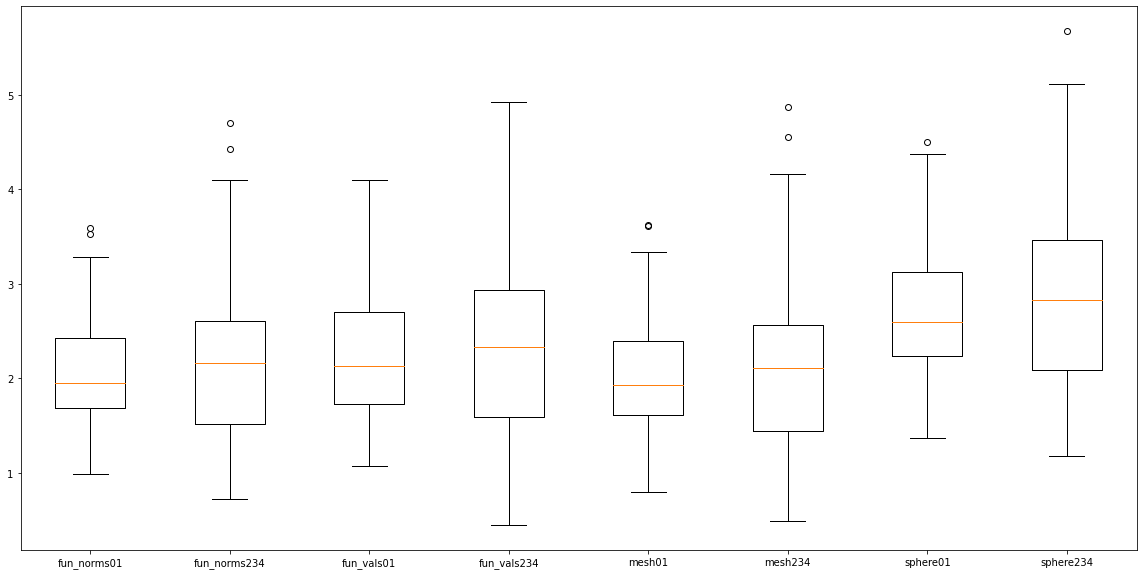

In [96]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['cMT'], fn234['cMT'], fv01['cMT'], fv234['cMT'], m01['cMT'], m234['cMT'], s01['cMT'], s234['cMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

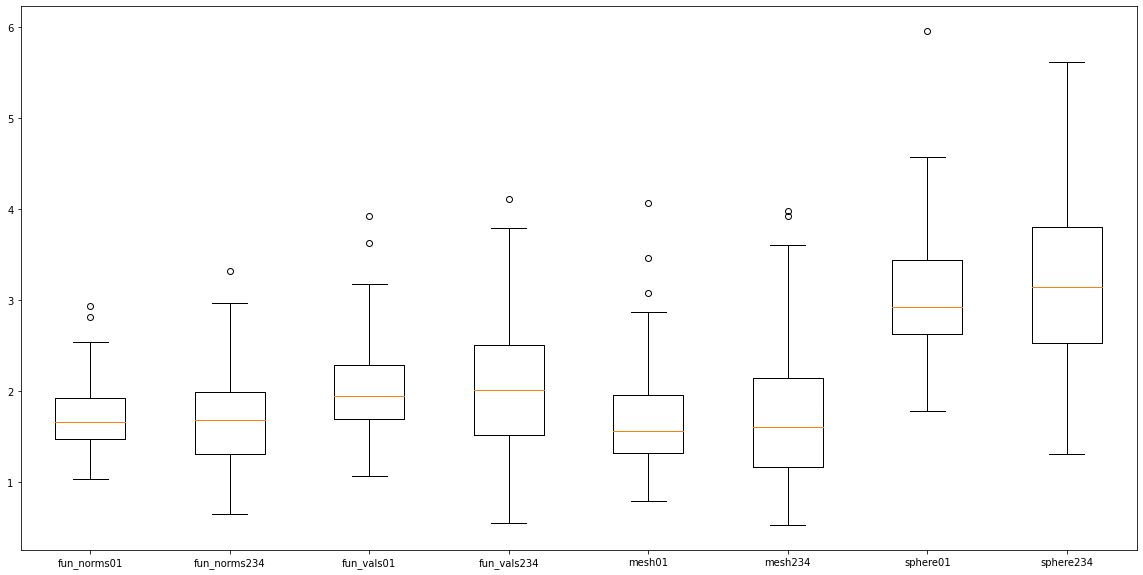

In [97]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['iMT'], fn234['iMT'], fv01['iMT'], fv234['iMT'], m01['iMT'], m234['iMT'], s01['iMT'], s234['iMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

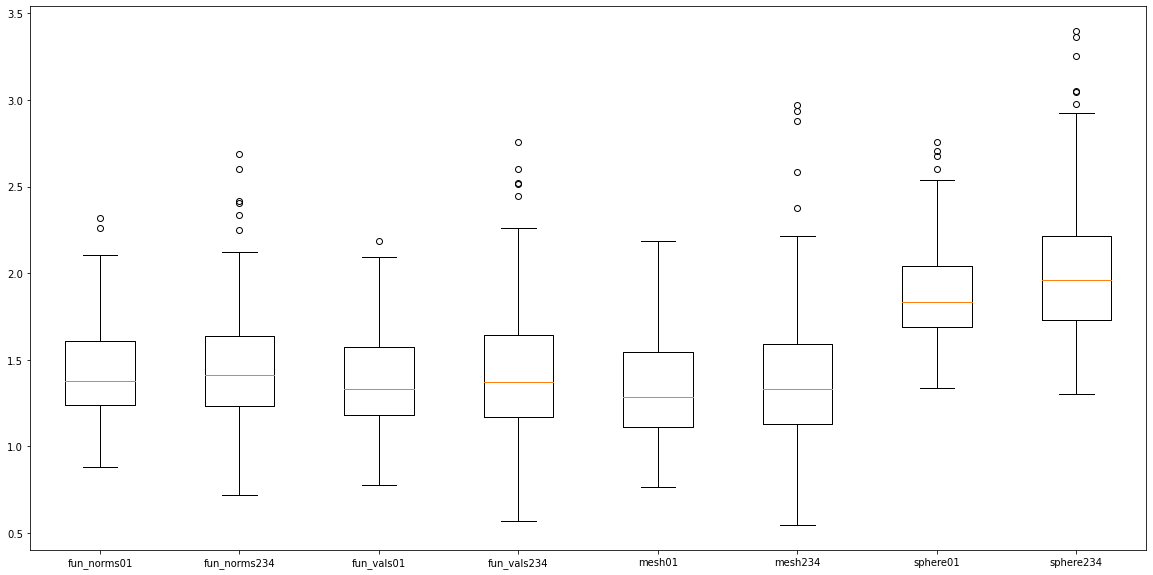

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['eMT'], fn234['eMT'], fv01['eMT'], fv234['eMT'], m01['eMT'], m234['eMT'], s01['eMT'], s234['eMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

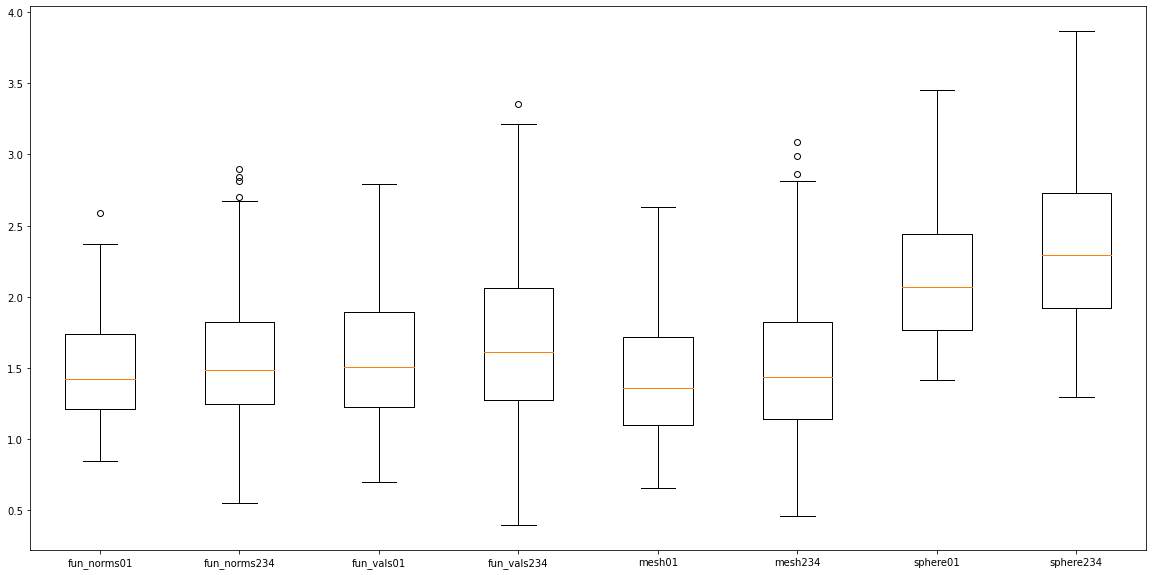

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['aMT'], fn234['aMT'], fv01['aMT'], fv234['aMT'], m01['aMT'], m234['aMT'], s01['aMT'], s234['aMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

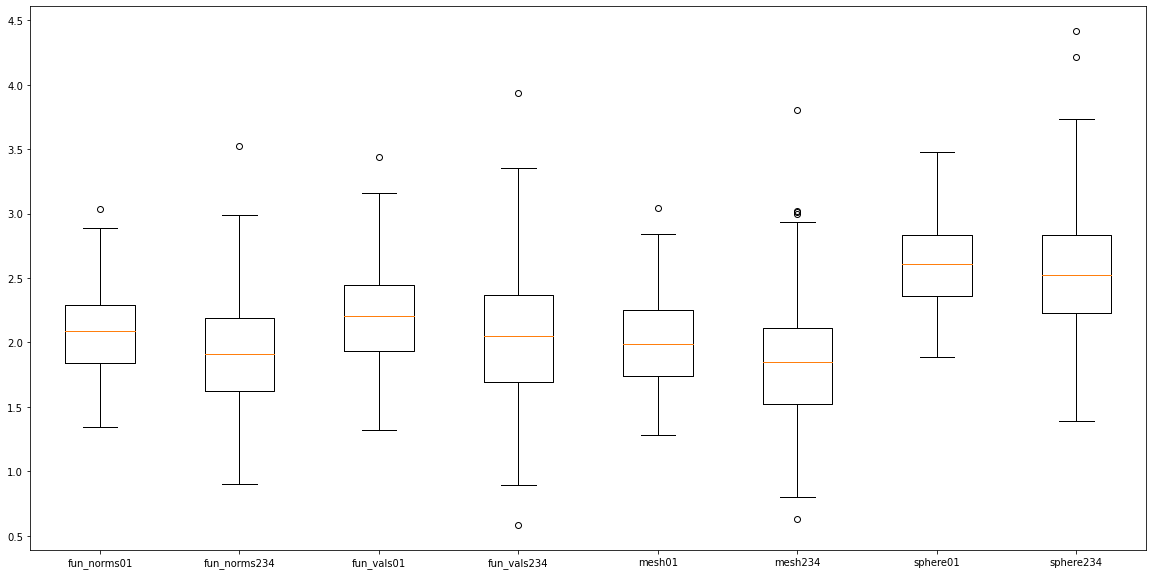

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([fn01['pMT'], fn234['pMT'], fv01['pMT'], fv234['pMT'], m01['pMT'], m234['pMT'], s01['pMT'], s234['pMT']])
ax.set_xticklabels(['fun_norms01', 'fun_norms234', 'fun_vals01', 'fun_vals234', 'mesh01', 'mesh234', 'sphere01', 'sphere234'])
plt.show()

In [40]:
fn0_lf_mean = fn0[lf_cols].apply(np.mean, axis=1)
fn4_lf_mean = fn4[lf_cols].apply(np.mean, axis=1)

fn0_mf_mean = fn0[mf_cols].apply(np.mean, axis=1)
fn4_mf_mean = fn4[mf_cols].apply(np.mean, axis=1)

fn0_lt_mean = fn0[lt_cols].apply(np.mean, axis=1)
fn4_lt_mean = fn4[lt_cols].apply(np.mean, axis=1)

fn0_mt_mean = fn0[mt_cols].apply(np.mean, axis=1)
fn4_mt_mean = fn4[mt_cols].apply(np.mean, axis=1)

fn0_clf_mean = fn0[['ccLF', 'icLF', 'ecLF']].apply(np.mean, axis=1)
fn4_clf_mean = fn4[['ccLF', 'icLF', 'ecLF']].apply(np.mean, axis=1)

fn0_cmf_mean = fn0[['ccMF', 'icMF', 'ecMF']].apply(np.mean, axis=1)
fn4_cmf_mean = fn4[['ccMF', 'icMF', 'ecMF']].apply(np.mean, axis=1)

fv0_lf_mean = fv0[lf_cols].apply(np.mean, axis=1)
fv4_lf_mean = fv4[lf_cols].apply(np.mean, axis=1)

fv0_mf_mean = fv0[mf_cols].apply(np.mean, axis=1)
fv4_mf_mean = fv4[mf_cols].apply(np.mean, axis=1)

fv0_lt_mean = fv0[lt_cols].apply(np.mean, axis=1)
fv4_lt_mean = fv4[lt_cols].apply(np.mean, axis=1)

fv0_mt_mean = fv0[mt_cols].apply(np.mean, axis=1)
fv4_mt_mean = fv4[mt_cols].apply(np.mean, axis=1)

fv0_clf_mean = fv0[['ccLF', 'icLF', 'ecLF']].apply(np.mean, axis=1)
fv4_clf_mean = fv4[['ccLF', 'icLF', 'ecLF']].apply(np.mean, axis=1)

fv0_cmf_mean = fv0[['ccMF', 'icMF', 'ecMF']].apply(np.mean, axis=1)
fv4_cmf_mean = fv4[['ccMF', 'icMF', 'ecMF']].apply(np.mean, axis=1)

m0_lf_mean = m0[lf_cols].apply(np.mean, axis=1)
m4_lf_mean = m4[lf_cols].apply(np.mean, axis=1)

m0_mf_mean = m0[mf_cols].apply(np.mean, axis=1)
m4_mf_mean = m4[mf_cols].apply(np.mean, axis=1)

m0_lt_mean = m0[lt_cols].apply(np.mean, axis=1)
m4_lt_mean = m4[lt_cols].apply(np.mean, axis=1)

m0_mt_mean = m0[mt_cols].apply(np.mean, axis=1)
m4_mt_mean = m4[mt_cols].apply(np.mean, axis=1)

m0_clf_mean = m0[['ccLF', 'icLF', 'ecLF']].apply(np.mean, axis=1)
m4_clf_mean = m4[['ccLF', 'icLF', 'ecLF']].apply(np.mean, axis=1)

m0_cmf_mean = m0[['ccMF', 'icMF', 'ecMF']].apply(np.mean, axis=1)
m4_cmf_mean = m4[['ccMF', 'icMF', 'ecMF']].apply(np.mean, axis=1)

s0_lf_mean = s0[lf_cols].apply(np.mean, axis=1)
s4_lf_mean = s4[lf_cols].apply(np.mean, axis=1)

s0_mf_mean = s0[mf_cols].apply(np.mean, axis=1)
s4_mf_mean = s4[mf_cols].apply(np.mean, axis=1)

s0_lt_mean = s0[lt_cols].apply(np.mean, axis=1)
s4_lt_mean = s4[lt_cols].apply(np.mean, axis=1)

s0_mt_mean = s0[mt_cols].apply(np.mean, axis=1)
s4_mt_mean = s4[mt_cols].apply(np.mean, axis=1)

s0_clf_mean = s0[['ccLF', 'icLF', 'ecLF']].apply(np.mean, axis=1)
s4_clf_mean = s4[['ccLF', 'icLF', 'ecLF']].apply(np.mean, axis=1)

s0_cmf_mean = s0[['ccMF', 'icMF', 'ecMF']].apply(np.mean, axis=1)
s4_cmf_mean = s4[['ccMF', 'icMF', 'ecMF']].apply(np.mean, axis=1)

In [42]:
xticklabels = ['3D-MN 0', '3D-MN 4', '3D-RT 0', '3D-RT 4', '2D-FN 0', '2D-FN 4', '2D-FS 0', '2D-FS 4']
region_figsize = (10, 10)
roa_figsize = (20, 10)

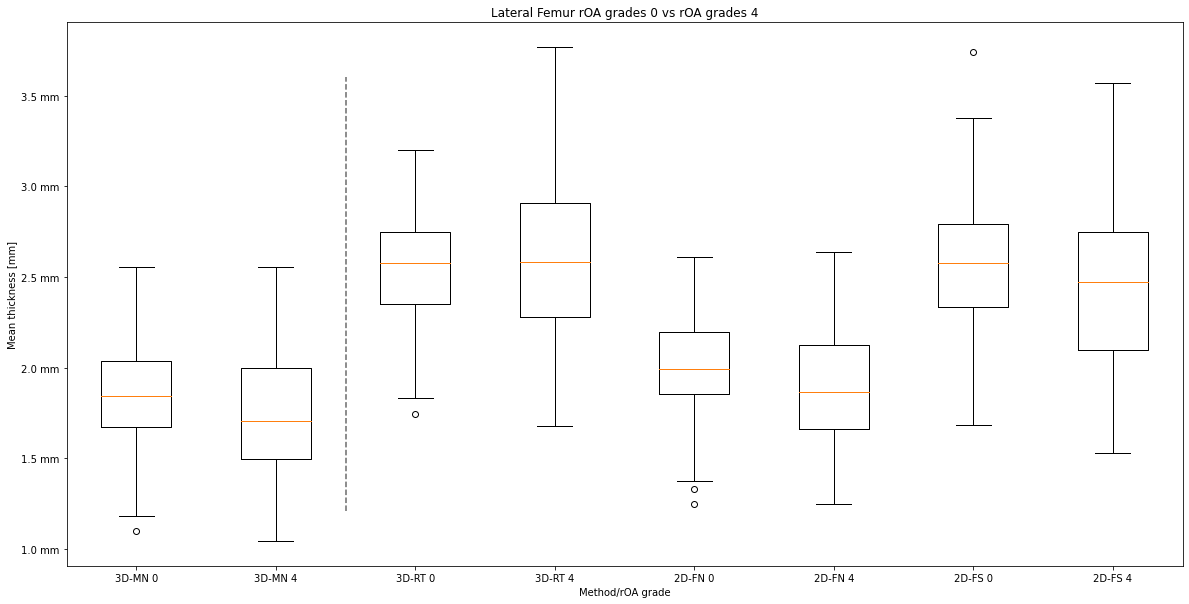

In [43]:
fig, ax = plt.subplots(figsize=roa_figsize)
# ax.boxplot([m01_lf_mean, fn01_lf_mean, fv01_lf_mean, s01_lf_mean, m234_lf_mean, fn234_lf_mean, fv234_lf_mean, s234_lf_mean])
ax.boxplot([m0_lf_mean, m4_lf_mean, s0_lf_mean, s4_lf_mean, fn0_lf_mean, fn4_lf_mean, fv0_lf_mean, fv4_lf_mean])
ax.set_xticklabels(xticklabels)
ax.vlines(x=2.5, ymin=ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * .1, ymax=ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * .9, linestyles='dashed', colors=['dimgray'])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f mm'))
ax.set_title('Lateral Femur rOA grades 0 vs rOA grades 4')
ax.set_xlabel('Method/rOA grade')
ax.set_ylabel('Mean thickness [mm]')
plt.show()

<hr>

# T-test for rOA 0,1 vs 2,3,4

In [101]:
roa_01_overall_mean = (fn01[all_cols] + fv01[all_cols] + m01[all_cols] + s01[all_cols]) / 4
roa_234_overall_mean = (fn234[all_cols] + fv234[all_cols] + m234[all_cols] + s234[all_cols]) / 4

In [102]:
roa_01_fold = roa_01_overall_mean.apply(np.mean, axis=1)
roa_234_fold = roa_234_overall_mean.apply(np.mean, axis=1)
stats.ttest_ind_from_stats(roa_01_fold.mean(), roa_01_fold.std(), roa_01_fold.shape[0], roa_234_fold.mean(), roa_234_fold.std(), roa_234_fold.shape[0])

Ttest_indResult(statistic=-0.19493555852468653, pvalue=0.845533579517183)

In [103]:
stats.t.ppf(.05, roa_01_fold.shape[0] + roa_234_fold.shape[0] - 2)

-1.6483320081356834

In [104]:
print(roa_01_fold.mean(), roa_234_fold.mean())

2.075900875141224 2.0812932178121604


In [105]:
df = roa_01_overall_mean.shape[0] + roa_234_overall_mean.shape[0] - 2
sigdif = stats.ttest_ind(roa_01_overall_mean.to_numpy(), roa_234_overall_mean.to_numpy())[0] >= stats.t.ppf(.05, df)

In [106]:
roa_01_overall_mean.columns[sigdif]

Index(['ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'cLT', 'eLT', 'cMT',
       'iMT', 'eMT', 'pMT'],
      dtype='object')

# ANOVA for mean over all regions

$$H_0: \mu_{fn} = \mu_{fv} = \mu_{m} = \mu_{s}$$ 

In [107]:
f, p = stats.f_oneway(fn_all_regions_mean.to_numpy(), fv_all_regions_mean.to_numpy(), m_all_regions_mean.to_numpy(), s_all_regions_mean.to_numpy())
print(f, p)

834.8354293087502 0.0


In [108]:
df_within = 4 * (len(fn_all_regions_mean.to_numpy()) - 1)
df_between = 4 - 1

f_crit = stats.f.ppf(q=.95, dfn=df_between, dfd=df_within)
print(f_crit, df_within, df_between)

2.6099698641072653 1756 3


$F(2,1290) = 665.77 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

### effect size with $\omega^2$

$$\omega^2 = \frac{SS_{between} - (p - 1) \cdot \hat{\sigma}^2_{within}}{SS_{total} + \hat{\sigma}^2_{within}}$$
where
$$SS_{between} = n \cdot \sum_{1}^{p}(\bar{X}_i - \bar{X})^2$$
$$SS_{within} = \sum_{1}^{p}\sum_{j}^{k}(x_{ij} - \bar{X}_i)^2$$
$$SS_{total} = SS_{between} + SS_{within}$$
$$\hat{\sigma}^2_{within} = \frac{SS_{within}}{n - 1}$$
$$n \:\text{is the sample size per group}$$
$$p \:\text{is the number of groups}$$

In [109]:
def omega_squared(*samples: pd.core.series.Series) -> float:
    tmp = [len(sample) for sample in samples]
    assert len(set(tmp)) == 1
    
    groups = [sample.to_numpy() for sample in samples]
    n = len(groups[0])
    p = len(groups)
    all_mean = np.mean(np.concatenate(groups))
    group_means = [np.mean(group) for group in groups]
    ss_between = n * sum([(x_i - all_mean)**2 for x_i in group_means])
    ss_within = 0
    for i in range(p):
        ss_within += sum([(x_ij - group_means[i])**2 for x_ij in groups[i]])
    
    var_within = ss_within / (n - 1)
    return (ss_between - (p - 1) * var_within) / (ss_between + ss_within + var_within)

In [110]:
omega_squared(fn_all_regions_mean, fv_all_regions_mean, m_all_regions_mean, s_all_regions_mean)

0.5844771046493895

In [111]:
n = len(fn_all_regions_mean.to_numpy())
p = 4
all_mean = np.mean(np.concatenate((fn_all_regions_mean.to_numpy(), fv_all_regions_mean.to_numpy(), m_all_regions_mean.to_numpy(), s_all_regions_mean.to_numpy())))
group_means = [np.mean(fn_all_regions_mean.to_numpy()), np.mean(fv_all_regions_mean.to_numpy()),
               np.mean(m_all_regions_mean.to_numpy()), np.mean(s_all_regions_mean.to_numpy())]
ss_between = n * sum([(x_i - all_mean)**2 for x_i in group_means])
ss_within = sum([(x_ij - group_means[0])**2 for x_ij in fn_all_regions_mean.to_numpy()]) + \
            sum([(x_ij - group_means[1])**2 for x_ij in fv_all_regions_mean.to_numpy()]) + \
            sum([(x_ij - group_means[2])**2 for x_ij in m_all_regions_mean.to_numpy()]) + \
            sum([(x_ij - group_means[3])**2 for x_ij in s_all_regions_mean.to_numpy()])
eta_square = ss_between / (ss_between + ss_within)
print(eta_square)
var_within = ss_within / (n - 1)
omega_square = (ss_between - (p - 1) * var_within) / (ss_between + ss_within + var_within)
print(omega_square)

0.5878424108946189
0.5844771046493895


### post-hoc Tukey's HSD

In [112]:
def tukeys_hsd(labels: list, *samples: pd.core.series.Series) -> pd.core.frame.DataFrame:
    tmp = [len(sample) for sample in samples]
    assert len(set(tmp)) == 1
    
    x = [sample.to_numpy() for sample in samples]
    l = len(x[0])
    g = [[label] * l for label in labels]
    return sp.posthoc_tukey_hsd(x=np.concatenate(x), g=np.concatenate(g), alpha=.05)

In [113]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_all_regions_mean, fv_all_regions_mean, m_all_regions_mean, s_all_regions_mean)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [114]:
x = [fn_all_regions_mean.to_numpy(), fv_all_regions_mean.to_numpy(), m_all_regions_mean.to_numpy(), s_all_regions_mean.to_numpy()]
l = len(fn_all_regions_mean.to_numpy())
g = [['fn'] * l, ['fv'] * l, ['m'] * l, ['s'] * l]
sp.posthoc_tukey_hsd(x=np.concatenate(x), g=np.concatenate(g), alpha=.05)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


# ANOVA for mean over lateral/medial femur/tibia

### lateral femur

In [115]:
f, p = stats.f_oneway(fn_lf_mean.to_numpy(), fv_lf_mean.to_numpy(), m_lf_mean.to_numpy(), s_lf_mean.to_numpy())
print(f, p)

474.40028471620354 1.017449719279792e-225


$F(2,1290) = 190.72 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

In [116]:
omega_squared(fn_lf_mean, fv_lf_mean, m_lf_mean, s_lf_mean)

0.4433276185853671

In [117]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_lf_mean, fv_lf_mean, m_lf_mean, s_lf_mean)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,0
m,1,1,1,1
s,1,0,1,1


### medial femur

In [118]:
f, p = stats.f_oneway(fn_mf_mean.to_numpy(), fv_mf_mean.to_numpy(), m_mf_mean.to_numpy(), s_mf_mean.to_numpy())
print(f, p)

607.5616852702086 7.969398880552575e-271


$F(2,1290) = 533.09 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

In [119]:
omega_squared(fn_mf_mean, fv_mf_mean, m_mf_mean, s_mf_mean)

0.5053988915028803

In [120]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_mf_mean, fv_mf_mean, m_mf_mean, s_mf_mean)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


### lateral tibia

In [121]:
f, p = stats.f_oneway(fn_lt_mean.to_numpy(), fv_lt_mean.to_numpy(), m_lt_mean.to_numpy(), s_lt_mean.to_numpy())
print(f, p)

1429.9933844438838 0.0


$F(2,1290) = 1361.18 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

In [122]:
omega_squared(fn_lt_mean, fv_lt_mean, m_lt_mean, s_lt_mean)

0.7071064771965937

In [123]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_lt_mean, fv_lt_mean, m_lt_mean, s_lt_mean)

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


### medial tibia

In [124]:
f, p = stats.f_oneway(fn_mt_mean.to_numpy(), fv_mt_mean.to_numpy(), m_mt_mean.to_numpy(), s_mt_mean.to_numpy())
print(f, p)

335.29427073247376 4.166807348985144e-172


$F(2,1290) = 328.86 > F_{crit} = 2.61$ $\rightarrow$ Reject $H_0$

In [125]:
omega_squared(fn_mt_mean, fv_mt_mean, m_mt_mean, s_mt_mean)

0.35933655895124766

In [126]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn_mt_mean, fv_mt_mean, m_mt_mean, s_mt_mean)

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


# ANOVA for subregions

In [127]:
f, p = stats.f_oneway(fn['ccLF'].to_numpy(), fv['ccLF'].to_numpy(), m['ccLF'].to_numpy(), s['ccLF'].to_numpy())
print(f, p)

106.99572332146552 1.2761229361475424e-63


In [128]:
omega_squared(fn['ccLF'], fv['ccLF'], m['ccLF'], s['ccLF'])

0.14848105477252077

In [129]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['ccLF'], fv['ccLF'], m['ccLF'], s['ccLF'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [130]:
f, p = stats.f_oneway(fn['icLF'].to_numpy(), fv['icLF'].to_numpy(), m['icLF'].to_numpy(), s['icLF'].to_numpy())
print(f, p)

367.11651307004865 4.725454246411749e-185


In [131]:
omega_squared(fn['icLF'], fv['icLF'], m['icLF'], s['icLF'])

0.3807118019949611

In [132]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['icLF'], fv['icLF'], m['icLF'], s['icLF'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [133]:
f, p = stats.f_oneway(fn['ecLF'].to_numpy(), fv['ecLF'].to_numpy(), m['ecLF'].to_numpy(), s['ecLF'].to_numpy())
print(f, p)

198.97015619327698 4.469333534084216e-111


In [134]:
omega_squared(fn['ecLF'], fv['ecLF'], m['ecLF'], s['ecLF'])

0.2481683018414663

In [135]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['ecLF'], fv['ecLF'], m['ecLF'], s['ecLF'])

,fn,fv,m,s
fn,1,0,0,1
fv,0,1,0,1
m,0,0,1,1
s,1,1,1,1


In [136]:
f, p = stats.f_oneway(fn['ccMF'].to_numpy(), fv['ccMF'].to_numpy(), m['ccMF'].to_numpy(), s['ccMF'].to_numpy())
print(f, p)

81.90451542363273 1.3560770306826567e-49


In [137]:
omega_squared(fn['ccMF'], fv['ccMF'], m['ccMF'], s['ccMF'])

0.11652389081453189

In [138]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['ccMF'], fv['ccMF'], m['ccMF'], s['ccMF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [139]:
f, p = stats.f_oneway(fn['icMF'].to_numpy(), fv['icMF'].to_numpy(), m['icMF'].to_numpy(), s['icMF'].to_numpy())
print(f, p)

305.7760992234795 1.0794482374928174e-159


In [140]:
omega_squared(fn['icMF'], fv['icMF'], m['icMF'], s['icMF'])

0.3381461655106588

In [141]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['icMF'], fv['icMF'], m['icMF'], s['icMF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [142]:
f, p = stats.f_oneway(fn['ecMF'].to_numpy(), fv['ecMF'].to_numpy(), m['ecMF'].to_numpy(), s['ecMF'].to_numpy())
print(f, p)

66.6234890081077 8.456085509165926e-41


In [143]:
omega_squared(fn['ecMF'], fv['ecMF'], m['ecMF'], s['ecMF'])

0.09585861422238141

In [144]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['ecMF'], fv['ecMF'], m['ecMF'], s['ecMF'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [145]:
f, p = stats.f_oneway(fn['aLF'].to_numpy(), fv['aLF'].to_numpy(), m['aLF'].to_numpy(), s['aLF'].to_numpy())
print(f, p)

911.0951913725235 0.0


In [146]:
omega_squared(fn['aLF'], fv['aLF'], m['aLF'], s['aLF'])

0.6056337905146387

In [147]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['aLF'], fv['aLF'], m['aLF'], s['aLF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [148]:
f, p = stats.f_oneway(fn['aMF'].to_numpy(), fv['aMF'].to_numpy(), m['aMF'].to_numpy(), s['aMF'].to_numpy())
print(f, p)

1536.6513409932281 0.0


In [149]:
omega_squared(fn['aMF'], fv['aMF'], m['aMF'], s['aMF'])

0.7218190282681022

In [150]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['aMF'], fv['aMF'], m['aMF'], s['aMF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [151]:
f, p = stats.f_oneway(fn['pLF'].to_numpy(), fv['pLF'].to_numpy(), m['pLF'].to_numpy(), s['pLF'].to_numpy())
print(f, p)

863.873836868935 0.0


In [152]:
omega_squared(fn['pLF'], fv['pLF'], m['pLF'], s['pLF'])

0.5927954681534551

In [153]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['pLF'], fv['pLF'], m['pLF'], s['pLF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [154]:
f, p = stats.f_oneway(fn['pMF'].to_numpy(), fv['pMF'].to_numpy(), m['pMF'].to_numpy(), s['pMF'].to_numpy())
print(f, p)

594.516037552102 1.2363301026050395e-266


In [155]:
omega_squared(fn['pMF'], fv['pMF'], m['pMF'], s['pMF'])

0.49993623801211

In [156]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['pMF'], fv['pMF'], m['pMF'], s['pMF'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [157]:
f, p = stats.f_oneway(fn['cLT'].to_numpy(), fv['cLT'].to_numpy(), m['cLT'].to_numpy(), s['cLT'].to_numpy())
print(f, p)

302.49162526052424 2.7523546610117966e-158


In [158]:
omega_squared(fn['cLT'], fv['cLT'], m['cLT'], s['cLT'])

0.33570133458865214

In [159]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['cLT'], fv['cLT'], m['cLT'], s['cLT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [160]:
f, p = stats.f_oneway(fn['iLT'].to_numpy(), fv['iLT'].to_numpy(), m['iLT'].to_numpy(), s['iLT'].to_numpy())
print(f, p)

2016.4769041419804 0.0


In [161]:
omega_squared(fn['iLT'], fv['iLT'], m['iLT'], s['iLT'])

0.77309485604623

In [162]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['iLT'], fv['iLT'], m['iLT'], s['iLT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [163]:
f, p = stats.f_oneway(fn['eLT'].to_numpy(), fv['eLT'].to_numpy(), m['eLT'].to_numpy(), s['eLT'].to_numpy())
print(f, p)

499.40401933066994 1.3222257433723959e-234


In [164]:
omega_squared(fn['eLT'], fv['eLT'], m['eLT'], s['eLT'])

0.45614344049415295

In [165]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['eLT'], fv['eLT'], m['eLT'], s['eLT'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,0,1
m,1,0,1,1
s,1,1,1,1


In [166]:
f, p = stats.f_oneway(fn['aLT'].to_numpy(), fv['aLT'].to_numpy(), m['aLT'].to_numpy(), s['aLT'].to_numpy())
print(f, p)

561.0193734561486 1.1697730318611595e-255


In [167]:
omega_squared(fn['aLT'], fv['aLT'], m['aLT'], s['aLT'])

0.4853412466326952

In [168]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['aLT'], fv['aLT'], m['aLT'], s['aLT'])

,fn,fv,m,s
fn,1,0,0,1
fv,0,1,1,1
m,0,1,1,1
s,1,1,1,1


In [169]:
f, p = stats.f_oneway(fn['pLT'].to_numpy(), fv['pLT'].to_numpy(), m['pLT'].to_numpy(), s['pLT'].to_numpy())
print(f, p)

1241.954370059063 0.0


In [170]:
omega_squared(fn['pLT'], fv['pLT'], m['pLT'], s['pLT'])

0.6769879298095055

In [171]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['pLT'], fv['pLT'], m['pLT'], s['pLT'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1


In [172]:
f, p = stats.f_oneway(fn['cMT'].to_numpy(), fv['cMT'].to_numpy(), m['cMT'].to_numpy(), s['cMT'].to_numpy())
print(f, p)

88.07687274770888 4.313198011498197e-53


In [173]:
omega_squared(fn['cMT'], fv['cMT'], m['cMT'], s['cMT'])

0.1246056728763657

In [174]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['cMT'], fv['cMT'], m['cMT'], s['cMT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [175]:
f, p = stats.f_oneway(fn['iMT'].to_numpy(), fv['iMT'].to_numpy(), m['iMT'].to_numpy(), s['iMT'].to_numpy())
print(f, p)

510.0576702424299 2.494735365673414e-238


In [176]:
omega_squared(fn['iMT'], fv['iMT'], m['iMT'], s['iMT'])

0.46142649817424014

In [177]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['iMT'], fv['iMT'], m['iMT'], s['iMT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [178]:
f, p = stats.f_oneway(fn['eMT'].to_numpy(), fv['eMT'].to_numpy(), m['eMT'].to_numpy(), s['eMT'].to_numpy())
print(f, p)

302.07504636399926 4.1539906999341e-158


In [179]:
omega_squared(fn['eMT'], fv['eMT'], m['eMT'], s['eMT'])

0.3353899586276247

In [180]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['eMT'], fv['eMT'], m['eMT'], s['eMT'])

,fn,fv,m,s
fn,1,0,1,1
fv,0,1,0,1
m,1,0,1,1
s,1,1,1,1


In [181]:
f, p = stats.f_oneway(fn['aMT'].to_numpy(), fv['aMT'].to_numpy(), m['aMT'].to_numpy(), s['aMT'].to_numpy())
print(f, p)

247.15909808730228 8.859950645625314e-134


In [182]:
omega_squared(fn['aMT'], fv['aMT'], m['aMT'], s['aMT'])

0.2916185951138721

In [183]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['aMT'], fv['aMT'], m['aMT'], s['aMT'])

,fn,fv,m,s
fn,1,1,0,1
fv,1,1,1,1
m,0,1,1,1
s,1,1,1,1


In [184]:
f, p = stats.f_oneway(fn['pMT'].to_numpy(), fv['pMT'].to_numpy(), m['pMT'].to_numpy(), s['pMT'].to_numpy())
print(f, p)

216.63769439011023 1.4776807649172038e-119


In [185]:
omega_squared(fn['pMT'], fv['pMT'], m['pMT'], s['pMT'])

0.2647037719431494

In [186]:
labels = ['fn', 'fv', 'm', 's']
tukeys_hsd(labels, fn['pMT'], fv['pMT'], m['pMT'], s['pMT'])

,fn,fv,m,s
fn,1,1,1,1
fv,1,1,1,1
m,1,1,1,1
s,1,1,1,1
